In [14]:
import os
import numpy as np
import pandas as pd
from skimage.io import imread # Install scikit-image if needed
from skimage.transform import resize
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import AxesGrid
import seaborn as sns

In [31]:
app_train = pd.read_csv('./csv/application_train.csv')
app_test = pd.read_csv('./csv/application_test.csv')
print('training data shape is', app_train.shape)
print(app_train['TARGET'].value_counts())
app_train.head()

training data shape is (307511, 122)
0    282686
1     24825
Name: TARGET, dtype: int64


,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [32]:
print('Testing data shape: ', app_test.shape)
app_test.head()

Testing data shape:  (48744, 121)


,SK_ID_CURR,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100001,Cash loans,F,N,Y,0,135000.0,568800.0,20560.5,450000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
1,100005,Cash loans,M,N,Y,0,99000.0,222768.0,17370.0,180000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
2,100013,Cash loans,M,Y,Y,0,202500.0,663264.0,69777.0,630000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,1.0,4.0
3,100028,Cash loans,F,N,Y,2,315000.0,1575000.0,49018.5,1575000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
4,100038,Cash loans,M,Y,N,1,180000.0,625500.0,32067.0,625500.0,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN


In [33]:
# 67个特征有缺失，49个数据缺失超过47%, 其中47个与住房特征有关，是否可以将这个住房特征用PCA降阶。
# 剩下ext_source 和 own_car_age。或者这49个特征可以尝试删除。
# Xgb可以handle缺失值
mv = app_train.isnull().sum().sort_values() # 每一列缺失了多少值
mv = mv[mv>0] # 有缺失值的列和缺失的数量
mv_rate = mv/len(app_train)
mv_df = pd.DataFrame({'mv':mv, 'mv_rate':mv_rate})
print('number of features with more than 47% missing', len(mv_rate[mv_rate>0.47]))
mv_rate[mv_rate> 0.47]

number of features with more than 47% missing 49


EMERGENCYSTATE_MODE             0.473983
TOTALAREA_MODE                  0.482685
YEARS_BEGINEXPLUATATION_MODE    0.487810
YEARS_BEGINEXPLUATATION_AVG     0.487810
YEARS_BEGINEXPLUATATION_MEDI    0.487810
FLOORSMAX_AVG                   0.497608
FLOORSMAX_MEDI                  0.497608
FLOORSMAX_MODE                  0.497608
HOUSETYPE_MODE                  0.501761
LIVINGAREA_AVG                  0.501933
LIVINGAREA_MODE                 0.501933
LIVINGAREA_MEDI                 0.501933
ENTRANCES_AVG                   0.503488
ENTRANCES_MODE                  0.503488
ENTRANCES_MEDI                  0.503488
APARTMENTS_MEDI                 0.507497
APARTMENTS_AVG                  0.507497
APARTMENTS_MODE                 0.507497
WALLSMATERIAL_MODE              0.508408
ELEVATORS_MEDI                  0.532960
ELEVATORS_AVG                   0.532960
ELEVATORS_MODE                  0.532960
NONLIVINGAREA_MODE              0.551792
NONLIVINGAREA_AVG               0.551792
NONLIVINGAREA_ME

In [34]:
app_train.dtypes.value_counts()

float64    65
int64      41
object     16
dtype: int64

In [35]:
## 65 浮点，41 整型，16个非数据特征，除了OCCUPATION_TYPE 和 ORGANIZATION_TYPE 其余应该都可以onehot encoding
app_train.select_dtypes('object').apply(pd.Series.nunique, axis = 0)

NAME_CONTRACT_TYPE             2
CODE_GENDER                    3
FLAG_OWN_CAR                   2
FLAG_OWN_REALTY                2
NAME_TYPE_SUITE                7
NAME_INCOME_TYPE               8
NAME_EDUCATION_TYPE            5
NAME_FAMILY_STATUS             6
NAME_HOUSING_TYPE              6
OCCUPATION_TYPE               18
WEEKDAY_APPR_PROCESS_START     7
ORGANIZATION_TYPE             58
FONDKAPREMONT_MODE             4
HOUSETYPE_MODE                 3
WALLSMATERIAL_MODE             7
EMERGENCYSTATE_MODE            2
dtype: int64

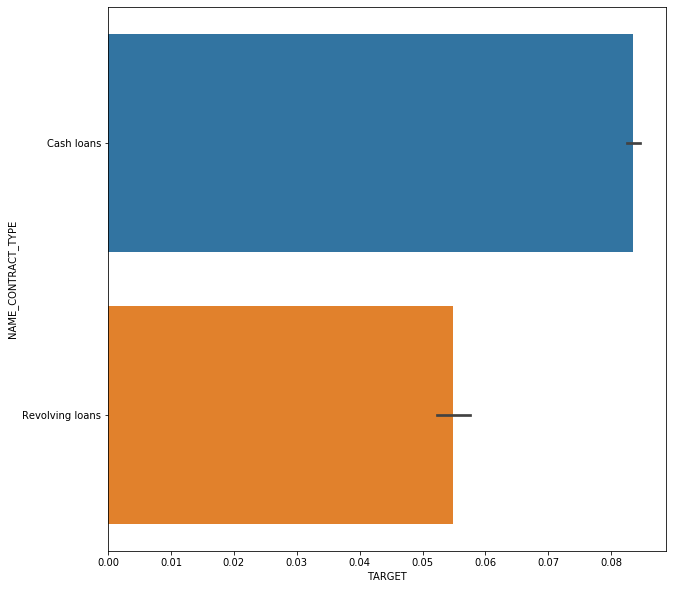

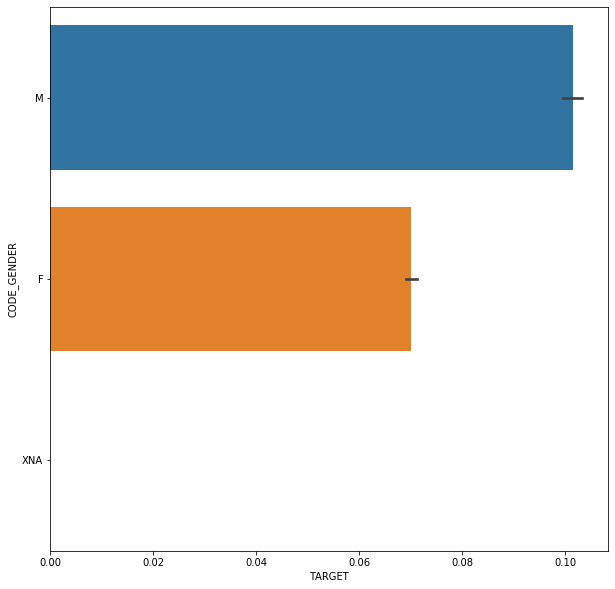

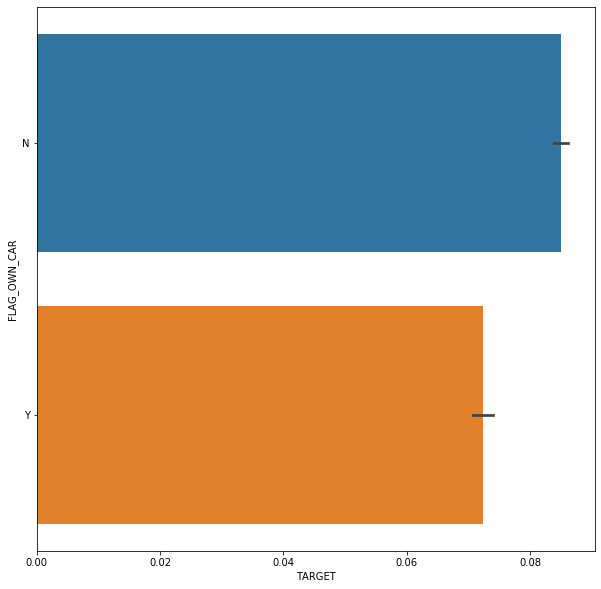

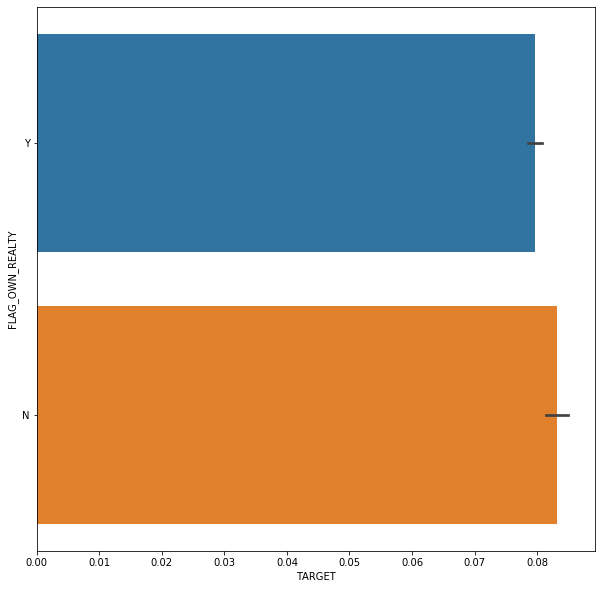

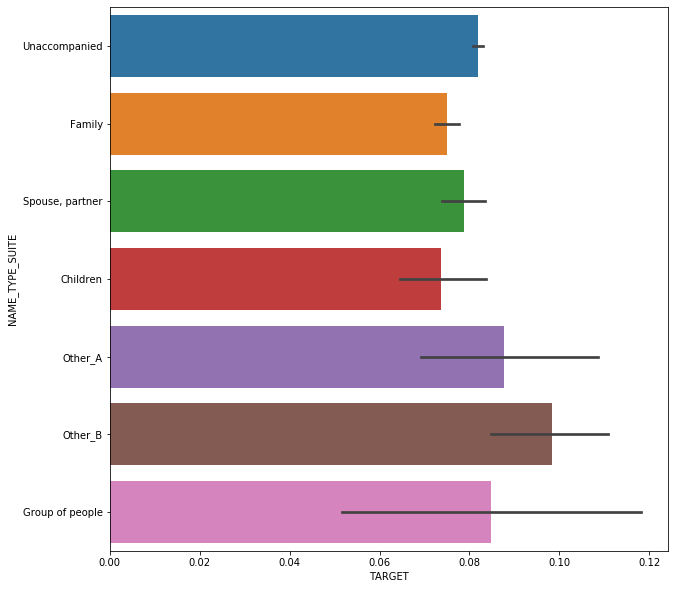

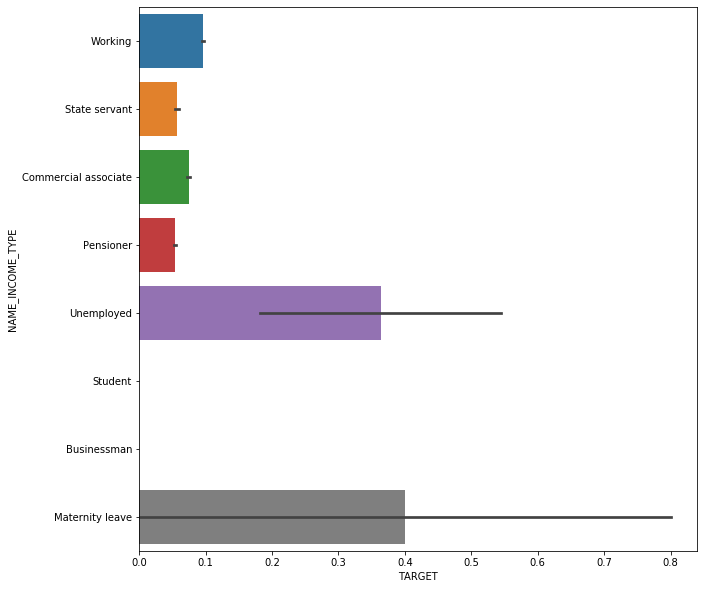

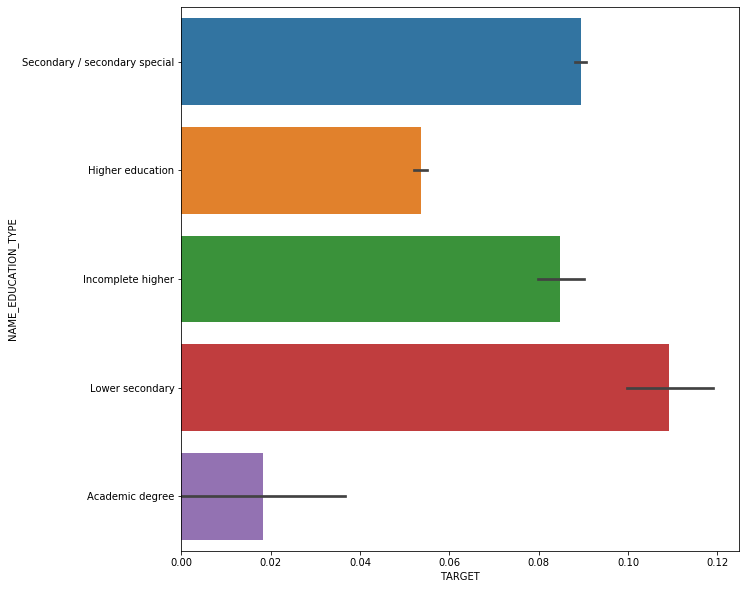

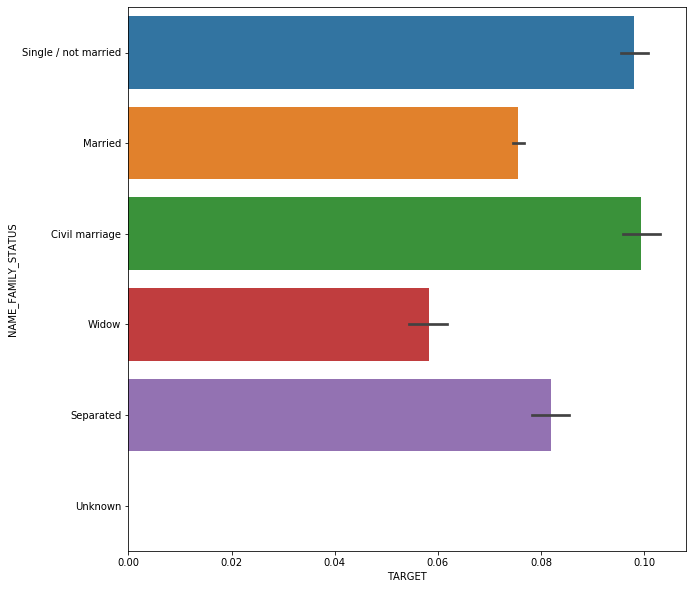

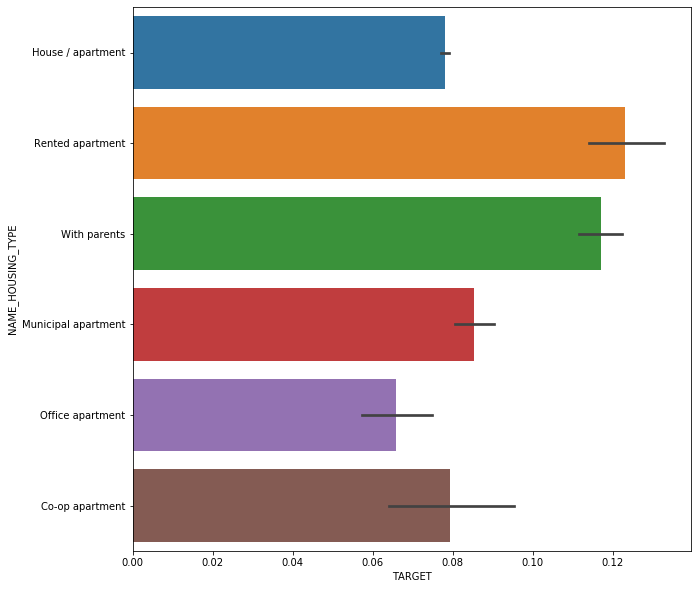

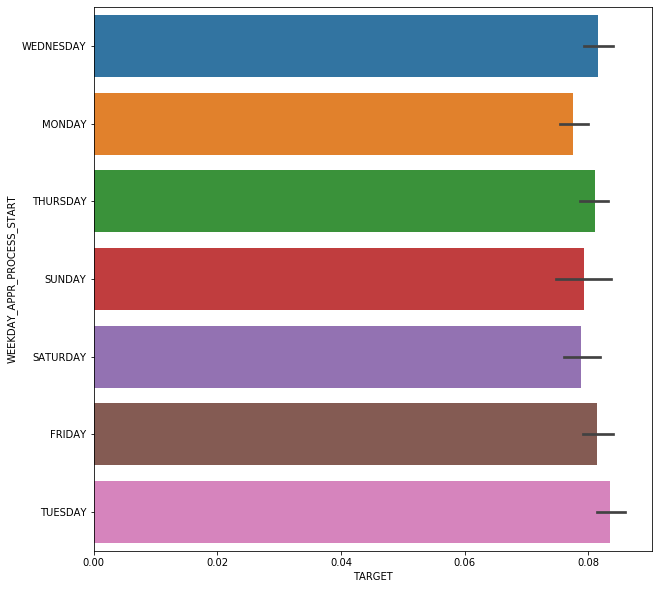

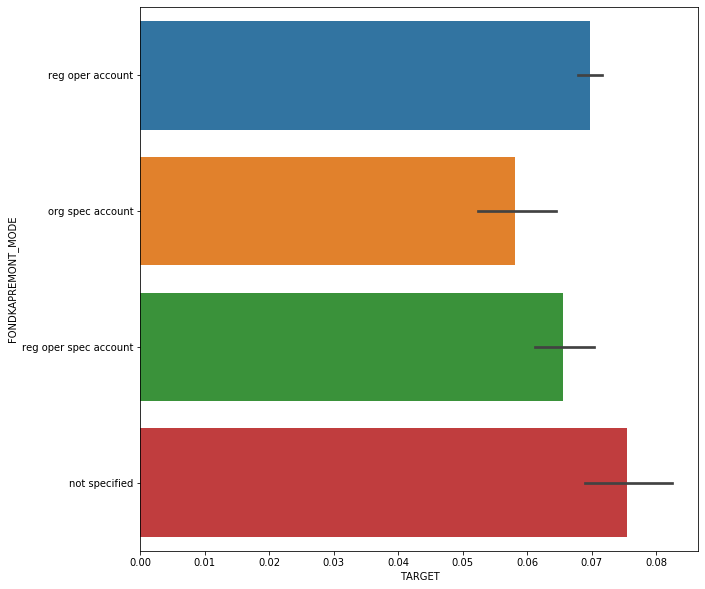

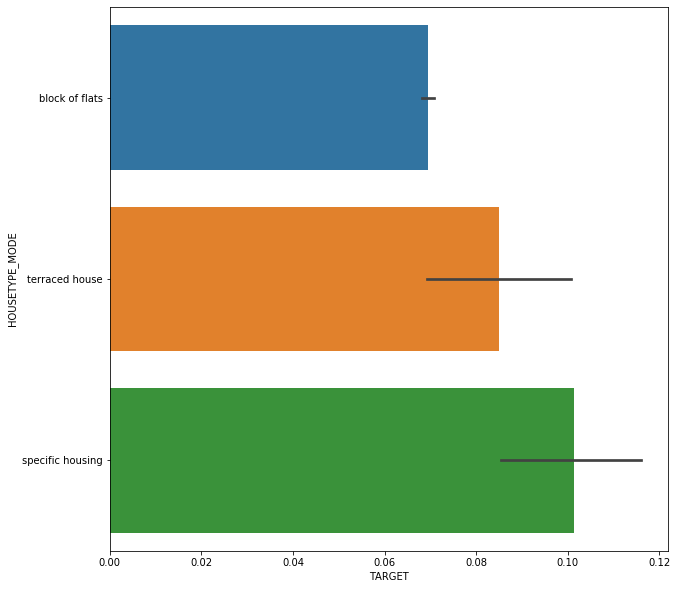

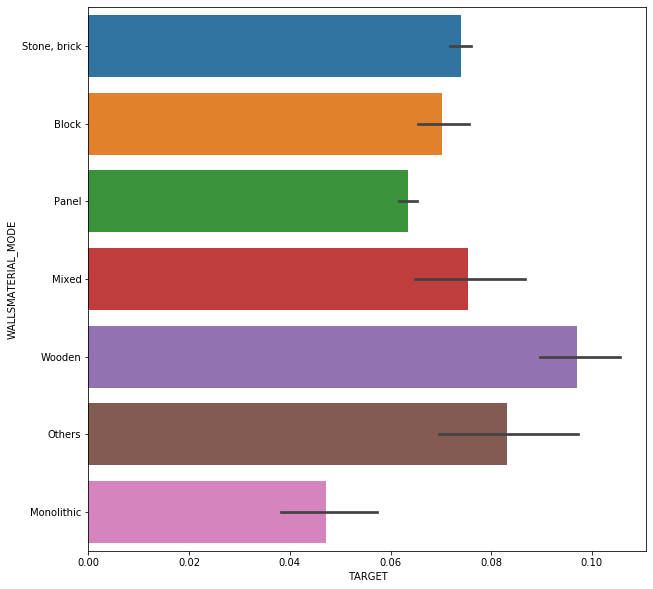

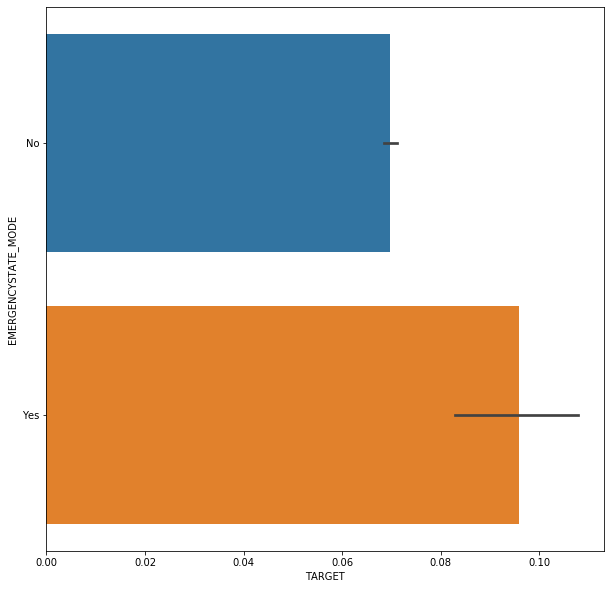

In [36]:

categorical = [col for col in app_train.columns if app_train[col].dtypes == 'object']
ct = app_train[categorical].nunique().sort_values()
for col in categorical:
    if (col!='OCCUPATION_TYPE') & (col!='ORGANIZATION_TYPE'):
        plt.figure(figsize = [10,10])
        sns.barplot(y = app_train[col], x = app_train['TARGET'])
# 对特征数为2的特征编码, nunique 和 len(unique)是不一样的，前者不计算null，后者会计算null

In [37]:
from sklearn.preprocessing import LabelEncoder
### 2个的用label encoding
lb = LabelEncoder()
count = 0
for col in categorical:
    if len(app_train[col].unique()) == 2:
        print("Encoding",col)
        count = count + 1
        lb.fit(app_train[col])
        app_train['o' + col] = lb.transform(app_train[col]) 
        app_test['o' + col] = lb.transform(app_test[col]) 
# housing type mode， family status的逾期率和分类有一定关系。

Encoding NAME_CONTRACT_TYPE
Encoding FLAG_OWN_CAR
Encoding FLAG_OWN_REALTY


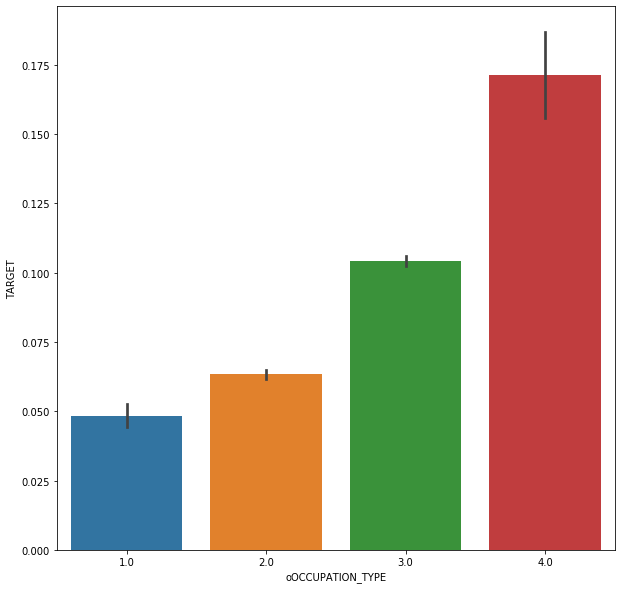

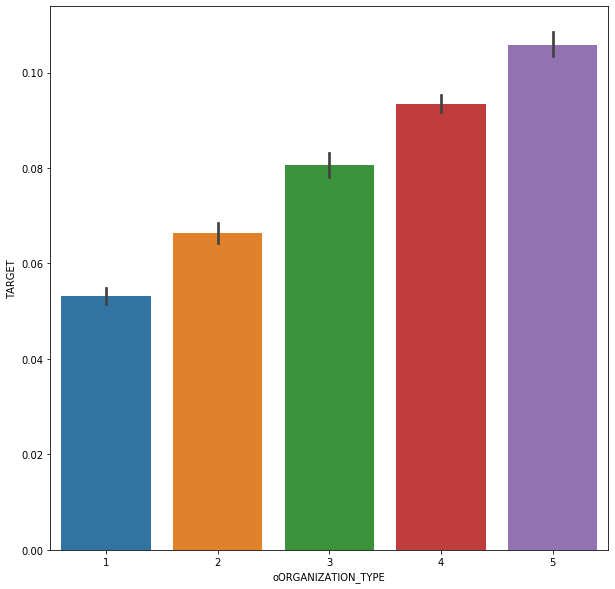

In [38]:
# OCCUPATION可以按以下编码
col = 'OCCUPATION_TYPE'
#occ_sort = app_train.groupby(['OCCUPATION_TYPE'])['TARGET'].agg(['mean','count']).sort_values(by = 'mean')
#order1 = list(occ_sort.index)
#plt.figure(figsize = [10,10])
#sns.barplot(y = app_train[col], x = app_train['TARGET'], order = order1)
dict1 = {'Accountants' : 1, 
         'High skill tech staff':2, 'Managers':2,  'Core staff':2, 
         'HR staff' : 2,'IT staff': 2, 'Private service staff': 2, 'Medicine staff': 2,
          'Secretaries': 2,'Realty agents': 2,
          'Cleaning staff': 3, 'Sales staff': 3,  'Cooking staff': 3,'Laborers': 3,
          'Security staff': 3,  'Waiters/barmen staff': 3,'Drivers': 3,
          'Low-skill Laborers': 4}
app_train['oOCCUPATION_TYPE'] = app_train['OCCUPATION_TYPE'].map(dict1)
app_test['oOCCUPATION_TYPE'] = app_test['OCCUPATION_TYPE'].map(dict1)
plt.figure(figsize = [10,10])
sns.barplot(x = app_train['oOCCUPATION_TYPE'], y = app_train['TARGET'])
##
col = 'ORGANIZATION_TYPE'
#organ_sort = app_train.groupby(['ORGANIZATION_TYPE'])['TARGET'].agg(['mean','count']).sort_values(by = 'mean')
#order1 = list(organ_sort.index)
#plt.figure(figsize = [20,20])
#sns.barplot(y = app_train[col], x = app_train['TARGET'], order = order1)

dict1 = {'Trade: type 4' :1,  'Industry: type 12' :1,  'Transport: type 1' :1,  'Trade: type 6' :1,
 'Security Ministries' :1,  'University' :1,  'Police' :1,  'Military' :1, 'Bank' :1, 'XNA' :1,
 
 'Culture' :2,  'Insurance' :2, 'Religion' :2,  'School' :2,  'Trade: type 5' :2, 'Hotel' :2, 'Industry: type 10' :2,
 'Medicine' :2,  'Services' :2,  'Electricity' :2,  'Industry: type 9' :2,  'Industry: type 5' :2, 'Government' :2,
 'Trade: type 2' :2, 'Kindergarten' :2, 'Emergency' :2, 'Industry: type 6' :2, 'Industry: type 2' :2, 'Telecom' :2,
 
 'Other' :3, 'Transport: type 2' :3, 'Legal Services' :3, 'Housing' :3, 'Industry: type 7' :3, 'Business Entity Type 1' :3,
 'Advertising' :3, 'Postal':3, 'Business Entity Type 2' :3, 'Industry: type 11' :3, 'Trade: type 1' :3, 'Mobile' :3,
 
 'Transport: type 4' :4, 'Business Entity Type 3' :4, 'Trade: type 7' :4, 'Security' :4, 'Industry: type 4' :4,
 
 'Self-employed' :5, 'Trade: type 3' :5, 'Agriculture' :5, 'Realtor' :5, 'Industry: type 3' :5, 'Industry: type 1' :5,
 'Cleaning' :5, 'Construction' :5, 'Restaurant' :5, 'Industry: type 8' :5, 'Industry: type 13' :5, 'Transport: type 3' :5}
app_train['oORGANIZATION_TYPE'] = app_train['ORGANIZATION_TYPE'].map(dict1)
app_test['oORGANIZATION_TYPE'] = app_test['ORGANIZATION_TYPE'].map(dict1)
plt.figure(figsize = [10,10])
sns.barplot(x = app_train['oORGANIZATION_TYPE'], y = app_train['TARGET'])

In [39]:
## 剩下的用ohe(307511, 127),(48744, 126) drop之后，feature分别为 122，121
discard_features = ['ORGANIZATION_TYPE', 'OCCUPATION_TYPE','FLAG_OWN_CAR','FLAG_OWN_REALTY','NAME_CONTRACT_TYPE']
app_train.drop(discard_features,axis = 1, inplace = True)
app_test.drop(discard_features,axis = 1, inplace = True)
print("training",app_train.shape)
print("test",app_test.shape)


training (307511, 122)
test (48744, 121)


In [40]:
# 然后使用 get_dummies(307511, 169) (48744, 165)
app_train = pd.get_dummies(app_train)
app_test = pd.get_dummies(app_test)
print('Training Features shape: ', app_train.shape)
print('Test Features shape: ', app_test.shape)

Training Features shape:  (307511, 169)
Test Features shape:  (48744, 165)


In [41]:
train_labels = app_train['TARGET']

# Align the training and testing data, keep only columns present in both dataframes
app_train, app_test = app_train.align(app_test, join = 'inner', axis = 1)

# Add the target back in
app_train['TARGET'] = train_labels

print('Training Features shape: ', app_train.shape)
print('Testing Features shape: ', app_test.shape)

Training Features shape:  (307511, 166)
Testing Features shape:  (48744, 165)


Most Positive Correlations:
 REG_CITY_NOT_LIVE_CITY                               0.044395
FLAG_EMP_PHONE                                       0.045982
NAME_EDUCATION_TYPE_Secondary / secondary special    0.049824
REG_CITY_NOT_WORK_CITY                               0.050994
DAYS_ID_PUBLISH                                      0.051457
CODE_GENDER_M                                        0.054713
DAYS_LAST_PHONE_CHANGE                               0.055218
NAME_INCOME_TYPE_Working                             0.057481
REGION_RATING_CLIENT                                 0.058899
REGION_RATING_CLIENT_W_CITY                          0.060893
oORGANIZATION_TYPE                                   0.070121
DAYS_EMPLOYED                                        0.074958
oOCCUPATION_TYPE                                     0.077514
DAYS_BIRTH                                           0.078239
TARGET                                               1.000000
Name: TARGET, dtype: float64

Most Negati

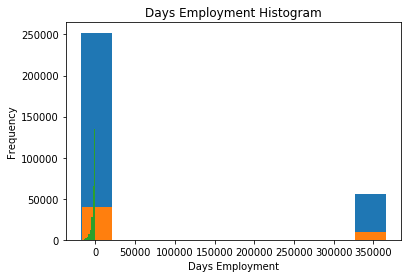

In [42]:
## 继续EDA， 在DAYS_EMPLOYED 里面发现有问题数据,这种处理应该是对线性方法有效，boost方法应该可以自动识别。
app_train['DAYS_EMPLOYED'].plot.hist(title = 'DAYS_EMPLOYMENT HISTOGRAM')
app_test['DAYS_EMPLOYED'].plot.hist(title = 'DAYS_EMPLOYMENT HISTOGRAM')
app_train['DAYS_EMPLOYED_ANOM'] = app_train['DAYS_EMPLOYED'] == 365243
app_train['DAYS_EMPLOYED'].replace({365243: np.nan}, inplace = True)
app_test['DAYS_EMPLOYED_ANOM'] = app_test["DAYS_EMPLOYED"] == 365243
app_test["DAYS_EMPLOYED"].replace({365243: np.nan}, inplace = True)

app_train['DAYS_EMPLOYED'].plot.hist(title = 'Days Employment Histogram');
plt.xlabel('Days Employment')

## 提取相关性
correlations = app_train.corr()['TARGET'].sort_values()
print('Most Positive Correlations:\n', correlations.tail(15))
print('\nMost Negative Correlations:\n', correlations.head(15))

In [43]:
## 特征工程
## 填充缺失值
from sklearn.preprocessing import Imputer, MinMaxScaler
imputer = Imputer(strategy = 'median')
scaler = MinMaxScaler(feature_range = [0,1])
train = app_train.drop(columns = ['TARGET'])

imputer.fit(train)
train = imputer.transform(train)
test = imputer.transform(app_test)
scaler.fit(train)
train = scaler.transform(train)
test = scaler.transform(test)
print('Training data shape: ', train.shape)
print('Testing data shape: ', test.shape)

/Users/dkoalal/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:66: DeprecationWarning: Class Imputer is deprecated; Imputer was deprecated in version 0.20 and will be removed in 0.22. Import impute.SimpleImputer from sklearn instead.
  warnings.warn(msg, category=DeprecationWarning)


Training data shape:  (307511, 166)
Testing data shape:  (48744, 166)


In [44]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
param_grid = {'C' : [0.01,0.1,1,10,100],
              'penalty' : ['l1','l2']}
log_reg = LogisticRegression()
grid_search = GridSearchCV(log_reg, param_grid, scoring = 'roc_auc', cv = 5)
grid_search.fit(train, train_labels) 

# Train on the training data
log_reg_best = grid_search.best_estimator_
log_reg_pred = log_reg_best.predict_proba(test)[:, 1]
submit = app_test[['SK_ID_CURR']]
submit['TARGET'] = log_reg_pred
submit.head()
submit.to_csv('log_reg_baseline_gridsearch2.csv', index = False)

/Users/dkoalal/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/dkoalal/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/dkoalal/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/dkoalal/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/dkoalal/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed

/Users/dkoalal/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/dkoalal/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/dkoalal/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/dkoalal/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/dkoalal/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed

In [45]:
grid_search.best_estimator_

LogisticRegression(C=10, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l1',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)